In [15]:
import time                   # To time processes
import warnings               # To suppress warnings

import numpy as np            # Data manipulation
import pandas as pd           # Dataframe manipulatio 

import matplotlib.pyplot as plt                   # For graphics
import seaborn as sns

#import plotly.plotly as py #For World Map
#import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.express as px

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler                                 # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation # For clustering
from sklearn.mixture import GaussianMixture                                      # For GMM clustering

import os                     # For os related operations
import sys                    # For data size

In [16]:
#!pip install plotly

In [17]:
wh = pd.read_csv(r"D:\AI-DATASETS\01-MISC\2017.csv") #Read the dataset
wh.describe()

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [18]:
wh.dtypes

Country                           object
Happiness.Rank                     int64
Happiness.Score                  float64
Whisker.high                     float64
Whisker.low                      float64
Economy..GDP.per.Capita.         float64
Family                           float64
Health..Life.Expectancy.         float64
Freedom                          float64
Generosity                       float64
Trust..Government.Corruption.    float64
Dystopia.Residual                float64
dtype: object

In [19]:
wh.head(10)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


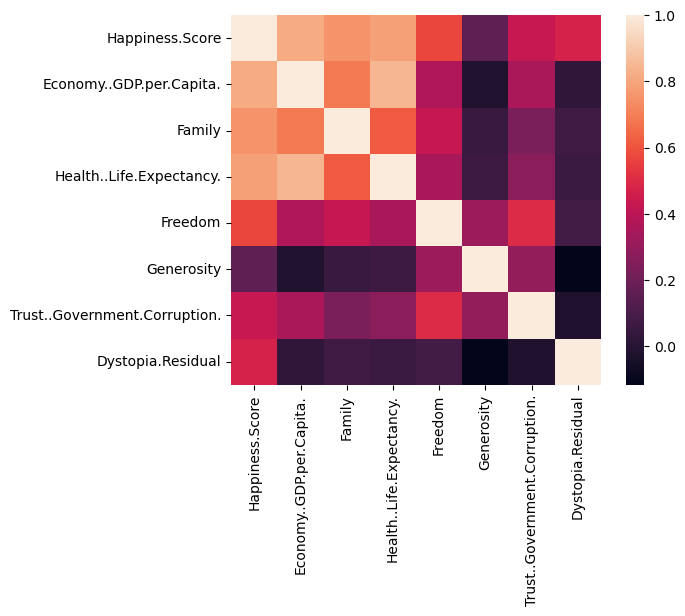

In [20]:
#Subsetting the data
wh1 = wh[['Happiness.Score',
          'Economy..GDP.per.Capita.',
          'Family',
          'Health..Life.Expectancy.', 
          'Freedom', 
          'Generosity',
          'Trust..Government.Corruption.',
          'Dystopia.Residual']] 

#Calculate the correlation of the above variables
corr = wh1.corr() 

#Plot the correlation as heat map
sns.heatmap(corr, square = True) ;

happiness score is highly correlated with GDP per capita, family and life expectancy. 

It is least correlated with generosity.

plot the happiness score of countries in the world map. Hovering the mouse over the country shows the name of the country as well as its happiness score.

In [21]:
import plotly.graph_objects as go

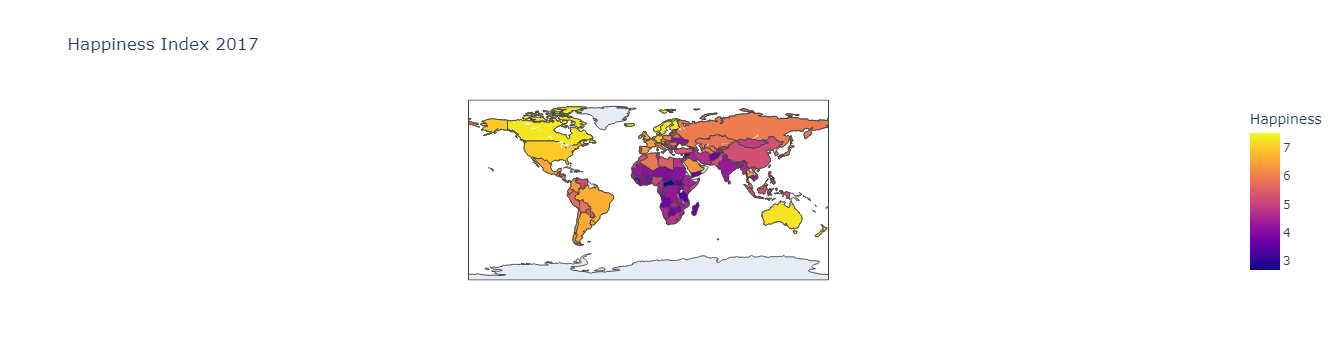

In [22]:
data = dict(type        = 'choropleth', 
           locations    = wh['Country'],
           locationmode = 'country names',
           z            = wh['Happiness.Score'], 
           text         = wh['Country'],
           colorbar     = {'title':'Happiness'})

layout = dict(title_text = 'Happiness Index 2017', 
#               geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)
#choromap3.show()
iplot(choromap3)

In [25]:
wh1

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
...,...,...,...,...,...,...,...,...
150,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,2.905,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024


## All unsup algos

#### k-means clustering

In [26]:
pip install --upgrade threadpoolctl

  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0
Note: you may need to restart the kernel to use updated packages.


In [27]:
def doKmeans(X, nclust=2):
    
    model = KMeans(nclust)
    
    model.fit(X)
    
    clust_labels = model.predict(X)
    
    cent = model.cluster_centers_
    
    return (clust_labels, cent)

In [28]:
clust_labels, cent = doKmeans(wh1, 2)

AttributeError: 'NoneType' object has no attribute 'split'

In [11]:
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans', kmeans)

NameError: name 'clust_labels' is not defined

In [12]:
wh1.head()

,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans
0,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0
1,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0
2,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0
3,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0
4,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0


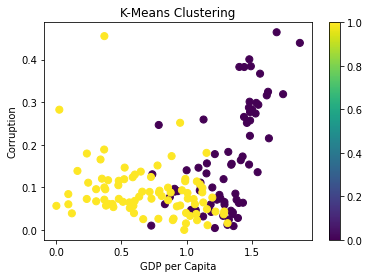

In [13]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],
                     wh1['Trust..Government.Corruption.'],
                     c=kmeans[0],
                     s=50)

ax.set_title('K-Means Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter);

#### Agglomerative Clustering

In [14]:
def doAgglomerative(X, nclust=2):
    
    model = AgglomerativeClustering(n_clusters=nclust, affinity = 'euclidean', linkage = 'ward')
    
    clust_labels1 = model.fit_predict(X)
    
    return (clust_labels1)

clust_labels1 = doAgglomerative(wh1, 2)

agglomerative = pd.DataFrame(clust_labels1)
wh1.insert((wh1.shape[1]),'agglomerative', agglomerative)

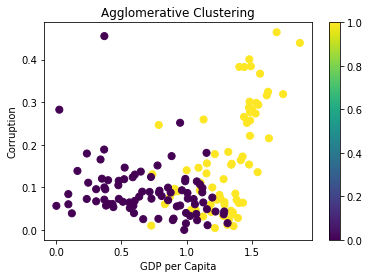

In [15]:
#Plot the clusters obtained using Agglomerative clustering or Hierarchical clustering
fig = plt.figure()
ax = fig.add_subplot(111)

scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],
                     wh1['Trust..Government.Corruption.'],
                     c=agglomerative[0],
                     s=50)

ax.set_title('Agglomerative Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter);

#### Affinity Propagation

It does not require the number of cluster to be estimated and provided before starting the algorithm. It makes no assumption regarding the internal structure of the data points. 

In [16]:
def doAffinity(X):
    model = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean')
    model.fit(X)
    clust_labels2 = model.predict(X)
    cent2 = model.cluster_centers_
    return (clust_labels2, cent2)

clust_labels2, cent2 = doAffinity(wh1)
affinity = pd.DataFrame(clust_labels2)
wh1.insert((wh1.shape[1]),'affinity',affinity)

D:\ANACONDA\lib\site-packages\sklearn\cluster\_affinity_propagation.py:152: FutureWarning:

'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.



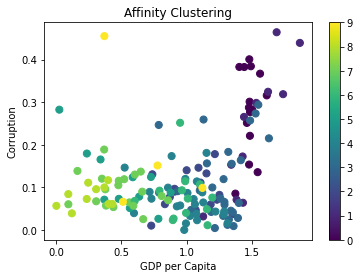

In [17]:
#Plotting the cluster obtained using Affinity algorithm
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=affinity[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter);

#### Guassian Mixture Modelling

It is probabilistic based clustering or kernel density estimation based clusterig. The clusters are formed based on the Gaussian distribution of the centers. 

In [18]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust_labels3 = model.predict(X)
    return (clust_labels3)

clust_labels3 = doGMM(wh1,2)
gmm = pd.DataFrame(clust_labels3)
wh1.insert((wh1.shape[1]),'gmm',gmm)

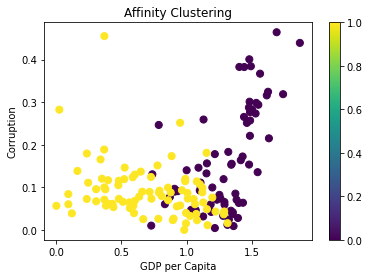

In [19]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['Economy..GDP.per.Capita.'],wh1['Trust..Government.Corruption.'],
                     c=gmm[0],s=50)
ax.set_title('Affinity Clustering')
ax.set_xlabel('GDP per Capita')
ax.set_ylabel('Corruption')
plt.colorbar(scatter)

## Visualization of countries based on the clustering results

####  k-Means algorithm

In [20]:
wh1.insert(0,'Country', wh.iloc[:,0])

In [21]:
wh1.head()

,Country,Happiness.Score,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,kmeans,agglomerative,affinity,gmm
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,0,1,0,0
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,0,1,0,0
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,0,1,0,0
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,0,1,0,0
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,0,1,0,0


In [22]:
wh1.iloc[:, [0,9,10,11,12]]

,Country,kmeans,agglomerative,affinity,gmm
0,Norway,0,1,0,0
1,Denmark,0,1,0,0
2,Iceland,0,1,0,0
3,Switzerland,0,1,0,0
4,Finland,0,1,0,0
...,...,...,...,...,...
150,Rwanda,1,0,9,1
151,Syria,1,0,9,1
152,Tanzania,1,0,9,1
153,Burundi,1,0,8,1


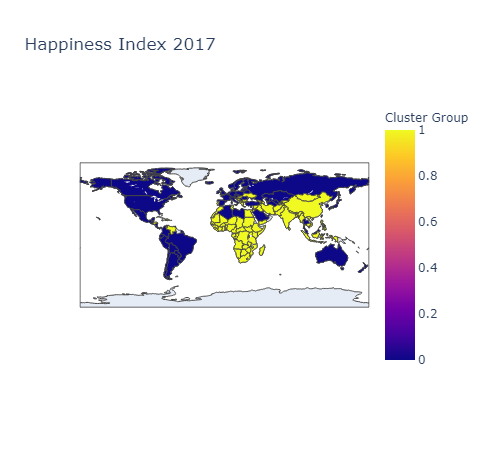

In [23]:
data = dict(type        = 'choropleth', 
           locations    = wh['Country'],
           locationmode = 'country names',
           z            = wh1['kmeans'], 
           text         = wh1['Country'],
           colorbar     = {'title':'Cluster Group'})

layout = dict(title_text = 'Happiness Index 2017', 
#               geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)
#choromap3.show()
iplot(choromap3)

#### Agglomerative Clustering

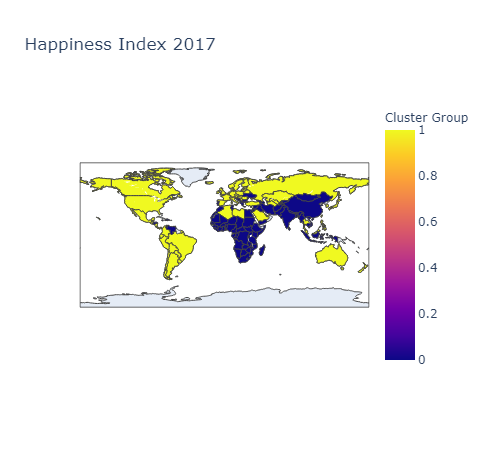

In [90]:
data = dict(type        = 'choropleth', 
           locations    = wh['Country'],
           locationmode = 'country names',
           z            = wh1['agglomerative'], 
           text         = wh1['Country'],
           colorbar     = {'title':'Cluster Group'})

layout = dict(title_text = 'Happiness Index 2017', 
#               geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)
#choromap3.show()
iplot(choromap3)

#### Affinity

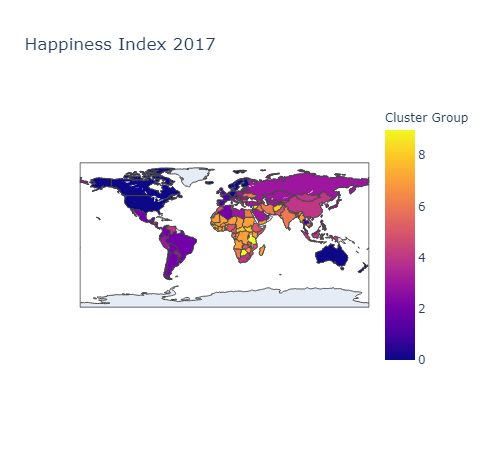

In [91]:
data = dict(type        = 'choropleth', 
           locations    = wh['Country'],
           locationmode = 'country names',
           z            = wh1['affinity'], 
           text         = wh1['Country'],
           colorbar     = {'title':'Cluster Group'})

layout = dict(title_text = 'Happiness Index 2017', 
#               geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)
#choromap3.show()
iplot(choromap3)

#### GMM

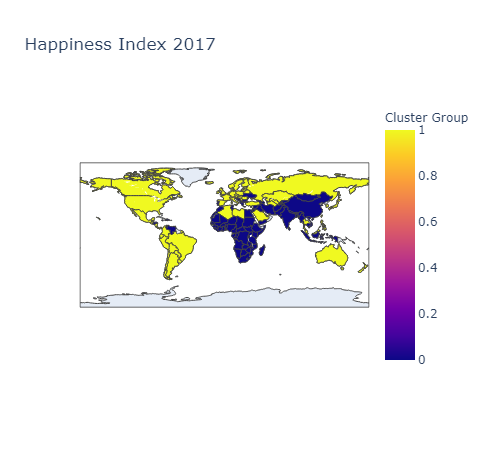

In [92]:
data = dict(type        = 'choropleth', 
           locations    = wh['Country'],
           locationmode = 'country names',
           z            = wh1['gmm'], 
           text         = wh1['Country'],
           colorbar     = {'title':'Cluster Group'})

layout = dict(title_text = 'Happiness Index 2017', 
#               geo = dict(showframe = False, 
#                        projection = {'type': 'Mercator'})
             )

choromap3 = go.Figure(data = [data], layout=layout)
#choromap3.show()
iplot(choromap3)

Quick visual analysis of heat map of clustering of countries shows that k-means, Agglomerative and GMM gives similar results. Affinity propagation clustering has grouped the countries into 10 clusters.